# Import Dependencies

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [35]:
import keras
from tensorflow.keras.utils import image_dataset_from_directory
from keras.applications import ResNet50
from keras.layers import Dense, Flatten
from keras import Model

# Load Dataset

In [5]:
train = 'xray_dataset_covid19/train/'
test = 'xray_dataset_covid19/test/'

In [7]:
train_ds = image_dataset_from_directory(train,
                                       batch_size=148
                                       )

test_ds = image_dataset_from_directory(test,
                                       batch_size=40
                                      )

Found 148 files belonging to 2 classes.
Found 40 files belonging to 2 classes.


# Split in Train and Test Data

In [20]:
single_batch = train_ds.as_numpy_iterator().next()
train_x, train_y = single_batch[0]/255, single_batch[1]
print("Train X: ", train_x.shape)
print("Train Y: ", train_y.shape)

Train X:  (148, 256, 256, 3)
Train Y:  (148,)


In [22]:
single_batch = test_ds.as_numpy_iterator().next()
test_x, test_y = single_batch[0]/255, single_batch[1]
print("Test X: ", test_x.shape)
print("Test Y: ", test_y.shape)

Test X:  (40, 256, 256, 3)
Test Y:  (40,)


In [24]:
label = os.listdir(train)
label

['NORMAL', 'PNEUMONIA']

# Overview

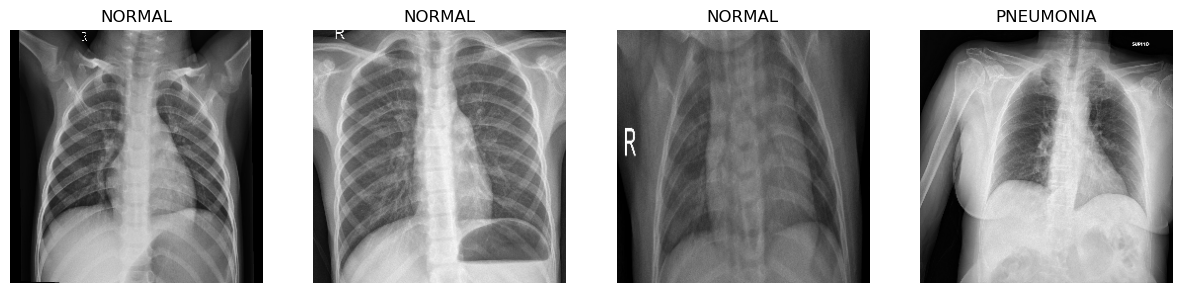

In [32]:
fig, ax = plt.subplots(1,4, figsize = (15,15))
for i in range(4):
    ax[i].axis('off')
    ax[i].imshow(train_x[i])
    ax[i].set_title(label[train_y[i]])

# Import RESNET50 MODEL

In [36]:
ResNet = ResNet50(include_top=False, input_shape=train_x[0].shape)

In [37]:
ResNet.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 262, 262, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 128, 128, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 128, 128, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 128, 128, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 130, 130, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 64, 64, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 64, 64, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 64, 64, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 64, 64, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 64, 64, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 64, 64, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 64, 64, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 64, 64, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 64, 64, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

# Customize Layers and Model

In [42]:
for layer in ResNet.layers:
    layer.trainable = False
print('Trainable Paramets: ', ResNet.trainable_variables)

Trainable Paramets:  []


In [53]:
x = Flatten()(ResNet.output)
output = Dense(1, activation='sigmoid')(x)
resnet_model = Model(ResNet.input, output)
resnet_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 262, 262, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 128, 128, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 128, 128, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 128, 128, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 130, 130, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 64, 64, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 64, 64, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 64, 64, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 64, 64, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 64, 64, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 64, 64, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 64, 64, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 64, 64, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 64, 64, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,718,785 (90.48 MB)

 Trainable params: 131,073 (512.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

# Loss function and optimizers

In [54]:
adam = keras.optimizers.Adam(0.01)
loss = keras.losses.BinaryCrossentropy()

resnet_model.compile(loss=loss, optimizer= adam)

# Train Model

In [61]:
History = resnet_model.fit(
    train_x,
    train_y,
    batch_size=64,
    epochs=15,
    validation_data=(test_x, test_y)
).history

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 38s 12s/step - loss: 1.0180 - val_loss: 1.5340
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 12s/step - loss: 0.7958 - val_loss: 0.1346
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 40s 12s/step - loss: 0.6988 - val_loss: 0.7565
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 36s 12s/step - loss: 0.6788 - val_loss: 0.2059
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 12s/step - loss: 0.6140 - val_loss: 0.8908
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 34s 11s/step - loss: 0.5863 - val_loss: 0.2261
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 11s/step - loss: 0.5999 - val_loss: 0.1702
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 11s/step - loss: 0.4768 - val_loss: 1.0334
Epoch 9/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 11s/step - loss: 0.5572 - val_loss: 0.0948
Epoch 10/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 34s 11s/step - loss: 0.8195 - val_loss: 1.2379
Epoch 11/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 34s 11s/step - loss: 0.8409 - val_loss: 0.5199
Epoch 12/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 36s 12s/step - loss: 0.3044 - val_loss: 0.2588
E

# Validate Model

Text(0, 0.5, 'Epochs')

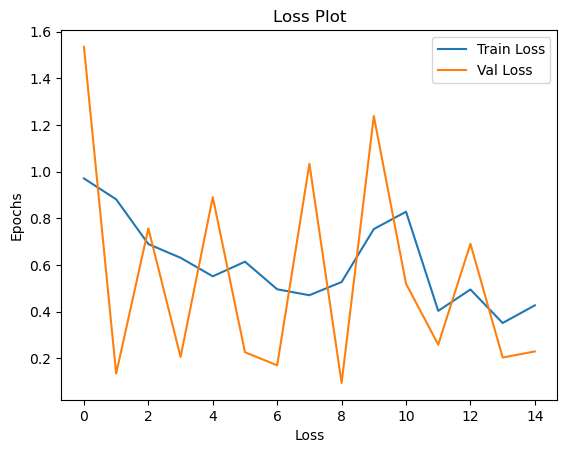

In [64]:
plt.title('Loss Plot')
plt.plot(History['loss'])
plt.plot(History['val_loss'])
plt.legend(['Train Loss', 'Val Loss'])
plt.xlabel('Loss')
plt.ylabel('Epochs')

In [72]:
y_pred = (resnet_model.predict(test_x).reshape(-1,)>=0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 9s/step


In [73]:
accuracy = np.sum(test_y==y_pred)/len(y_pred)

In [74]:
print("The model have an accuracy of:", accuracy)

The model have an accuracy of: 0.975


In [76]:
acc = resnet_model.evaluate(test_x, test_y)
acc

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.1594


0.22961008548736572

# Prediction

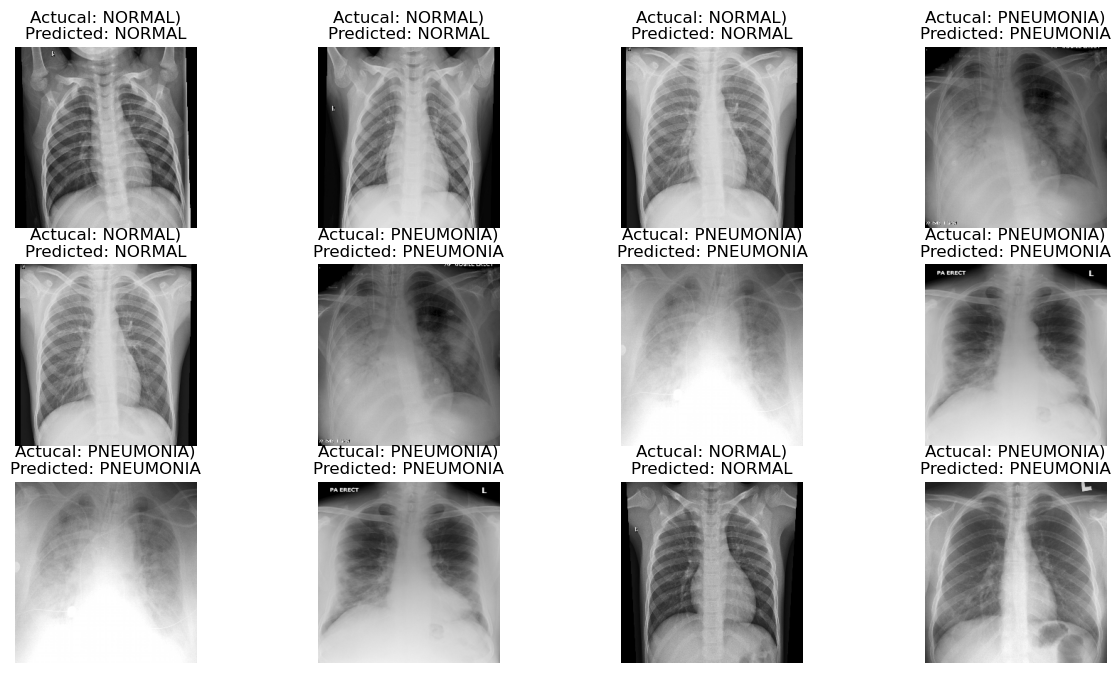

In [96]:
fig, ax = plt.subplots(3,4, figsize = (15, 8))
for i in range(3):
    for j in range(4):
        idx = 2*i+j
        ax[i][j].imshow(test_x[idx])
        ax[i][j].axis('off')
        ax[i][j].set_title(f'Actucal: {label[test_y[idx]]})\nPredicted: {label[y_pred[idx]]}')
    

# save model

In [83]:
resnet_model.save('resnet_model.h5')

In [85]:
# Save the model in the recommended Keras format
resnet_model.save('res_model.keras')